In [1]:
import sklearn

from sklearn import metrics
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_1 = np.array([[random.randint(1,400) for i in range(2)]for j in range(50)],
                 dtype=np.float64)

data_2 = np.array([[random.randint(300,700) for i in range(2)] for j in range(50)],
                 dtype=np.float64)

data_3 = np.array([[random.randint(600,900) for i in range(2)]for j in range(50)],
                 dtype=np.float64)

data = np.append(np.append(data_1,data_2,axis=0),data_3,axis=0)

I'll now randomly generate a toy dataset. I'm going to use the random number generator in Python to generate data, which will artificially be in three separate clusters. In order to visualize K-means clustering, we'll work with data in two dimensions. Every data point will have an X coordinate and a Y coordinate. Here is an array of 50 data points, these are integers in the range 1 to 400, but the data type of this array that I instantiate is float64. Here are the 50 points that I generated with X and Y coordinates, both X and Y coordinates will be in the range 1 to 400 based on my random integer generation. This specification here, a for loop in range 2 is what generates first, an X coordinate and then a Y coordinate. And both X and Y coordinates will be in the range 1 to 400. This is my input to random.randint. I'll now generate 2 more sets of 50 data points in exactly the same manner, but these data points will be in the range 300 to 700 and 600 to 900. These are the ranges of the X and the Y coordinates of the data points. Observe that there is some overlap in each of these three ranges. I'll now bring together these three sets of data points into one NumPy array called data. This array data now has 150 data points, and each point is expressed using 2 coordinates, X and Y. 

In [3]:
data

array([[  9., 330.],
       [239., 202.],
       [367.,  24.],
       [102.,  94.],
       [247., 336.],
       [240.,  35.],
       [105., 254.],
       [372., 382.],
       [271., 382.],
       [ 55., 324.],
       [267.,  12.],
       [373.,  67.],
       [177., 306.],
       [223., 290.],
       [147.,  59.],
       [ 50.,  96.],
       [ 61., 266.],
       [303., 131.],
       [125., 185.],
       [310., 369.],
       [307., 210.],
       [397.,   7.],
       [ 65., 252.],
       [206., 126.],
       [ 79., 138.],
       [123., 343.],
       [156., 258.],
       [347., 242.],
       [135., 232.],
       [280., 295.],
       [352.,  36.],
       [330., 300.],
       [282.,  81.],
       [351., 326.],
       [361.,  79.],
       [ 64., 392.],
       [312., 390.],
       [198., 196.],
       [364., 381.],
       [268.,  96.],
       [311.,  43.],
       [388., 396.],
       [232.,  52.],
       [288.,  16.],
       [390.,  70.],
       [243., 288.],
       [292., 207.],
       [245.,

In [4]:
data.shape

(150, 2)

We'll now use the Matplotlib library in order to visualize this data as a 2-D scatter plot called plt.scatter, and plot the X and Y coordinates of these data points. 

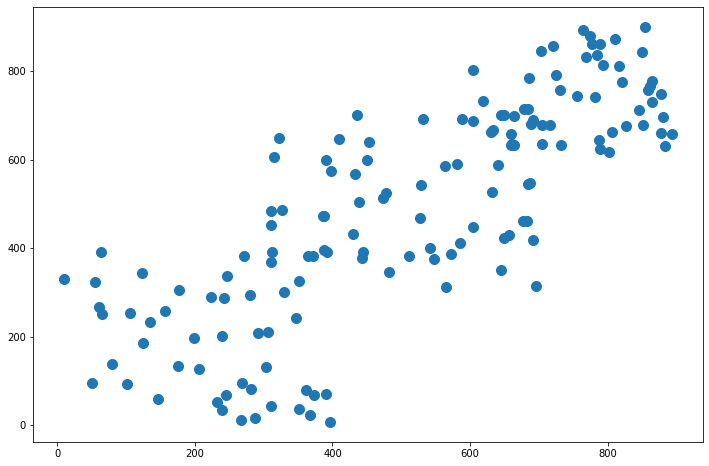

In [5]:
fig, ax = plt.subplots(figsize = (12,8))

plt.scatter(data[:,0],data[:,1],s=100)

And here is a representation of all 150 of our points in a 2-dimensional plane. You can see here that there are three very obvious sets of clusters because of the way we artificially generated our data. This visual representation will allow us to see if K-means clustering successfully identifies these clusters.

Now let's go ahead and assign labels to each set of 50 points. We'll have labels 0, 1, and 2, the first set of 50 points that have their X and Y coordinate between 1 and 400 have the label 0, and the remaining 2 sets have the label 1 and 2 correspondingly.

In [6]:
labels_1 = np.array([0 for i in range(50)])

labels_2 = np.array([1 for i in range(50)])

labels_3 = np.array([2 for i in range(50)])

labels = np.append(np.append(labels_1,labels_2,axis=0),labels_3,axis=0)

 This will allow us to identify each cluster of points as belonging to a different class or category. I'm going to append all of these labels together into a single NumPy array, and here is what my labels array looks like.

In [7]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The first set of 50 points all belong to the category 0, the second set to category 1, and the third set to category 2. It's always easy to work with data in a tabular format rather than just with NumPy arrays

Let's create a new data frame with the X coordinate, the Y coordinates, and the category of each data point.

In [8]:
df = pd.DataFrame({'data_x':data[:,0],'data_y':data[:,1],'labels':labels})

df.sample(10)

,data_x,data_y,labels
88,547.0,375.0,1
35,64.0,392.0,0
99,443.0,378.0,1
130,685.0,714.0,2
113,794.0,813.0,2
133,806.0,661.0,2
143,894.0,657.0,2
84,310.0,452.0,1
12,177.0,306.0,0
114,859.0,756.0,2


And this is what a sample of our data frame looks like. This is the data that we are going to work with to perform K-means clustering. Here is a slightly different visualization of our data. We'll color the points which we believe belong to different clusters using different colors, green, blue, and purple. The color of each point in the original scatter plot that we had created will depend on the label that we associated with that data point. Observe the C map here, this uses a listed color map in Matplotlib, and this is what we'll color category 0 points in green, 1 in blue, and 2 in purple. 

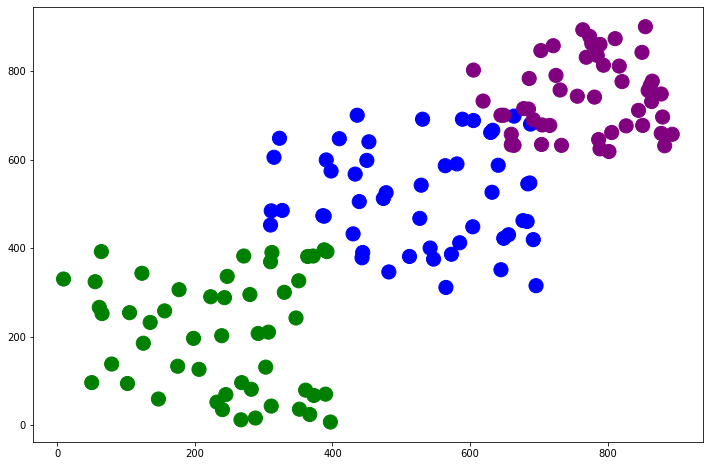

In [9]:
colors = ['green','blue','purple']

plt.figure(figsize=(12,8))
plt.scatter(df['data_x'],df['data_y'], c=df['labels'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

And here is the scatter plot visualizing our data with different colors for the different categories of data. With our data set up correctly, using the K-means estimator object in scikit-learn is very straightforward.

In [10]:
kmeans_model = KMeans(n_clusters=3,max_iter=10000).fit(data)

The first step is to instantiate the K-means estimator. Now for K-means, you need to know up front the number of clusters you want to partition of cluster your data into. We'll pass in the n_clusters parameter as 3, and we'll run clustering for a maximum of 10, 000 iterations. And we'll perform this clustering on the 2-D data that we set up, this is a NumPy array data that we pass into our clustering estimator. Calling fit will perform the clustering on the underlying data, and once clustering is complete, the labels attribute for our model will give us the label categories that the model has assigned the data. 

In [11]:
kmeans_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The model assigns numeric categories or cluster values starting with 0, 0, 1, and 2, but the first cluster is called 0, the second cluster is called 2, and the third cluster is called 1. And if you look carefully at the result here, you can see that the categories assigned by K-means clustering are a little different than the original categories that we assigned.

In [12]:
centroids = kmeans_model.cluster_centers_
centroids

array([[745.11666667, 723.51666667],
       [220.62790698, 175.6744186 ],
       [478.06382979, 467.04255319]])

Because we partitioned this data into three clusters, K-means clustering has found three cluster centers or centroids. Let's take a look at what they are. And here are the coordinate values of the centroids of the three clusters. Remember that when we perform K-means clustering, the centroids or cluster centers need not be coordinates that exist in the original data. This first pair of coordinates corresponds to the first cluster, represented by the K-means label 1. This second set of coordinates corresponds to the second cluster, represented by label 2. Remember that these are the labels assigned by K-means clustering, our original labels were a little different.

We'll now take the help of Matplotlib once again to visualize where exactly these cluster centers are located. We'll plot a scatter plot of the cluster centers, as you see here on screen, and we'll annotate each of the cluster centers with the category label generated when we used K-means clustering.

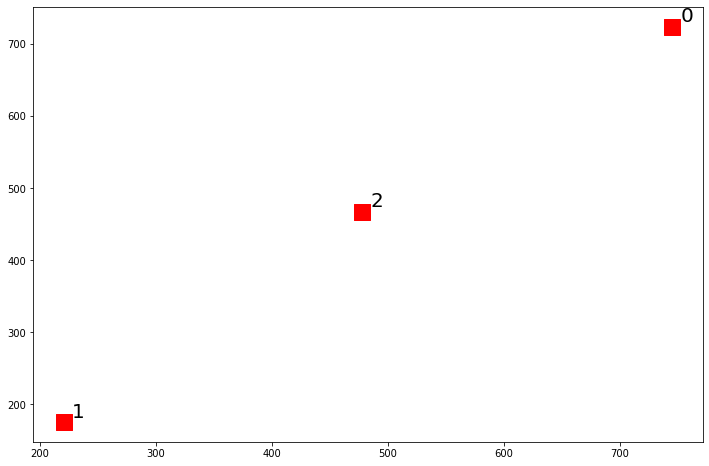

In [13]:
fig, ax = plt.subplots(figsize = (12,8))

plt.scatter(centroids[:,0],centroids[:,1],s=250,c='r',marker='s')

for i in range(len(centroids)):
    plt.annotate(i,(centroids[i][0]+7,centroids[i][1]+7),fontsize=20)

 And here is what the resulting plot looks like. 

You can see that we have 3 cluster centers labeled 1, 2, and 0, and these labels are a little different from the labels that we had assigned to classify our data. Our original labels were 0, 1, and 2 respectively. 


The fact that the labels are numerically different does not matter, remember a label is just a way to differentiate points that belong to different clusters.

In [14]:
print("Homogenity_score          :",metrics.homogeneity_score(labels,kmeans_model.labels_))
print("Completeness_score        :",metrics.completeness_score(labels,kmeans_model.labels_))
print("v_measure_score           :",metrics.v_measure_score(labels,kmeans_model.labels_))
print("adjusted_rand_score       :",metrics.adjusted_rand_score(labels,kmeans_model.labels_))
print("adjusted_mutual_info_score:",metrics.adjusted_mutual_info_score(labels,kmeans_model.labels_))
print("silhouette_score          :",metrics.silhouette_score(data,kmeans_model.labels_))

Homogenity_score          : 0.7159200378678884
Completeness_score        : 0.722699032345576
v_measure_score           : 0.7192935632740629
adjusted_rand_score       : 0.7014068460101024
adjusted_mutual_info_score: 0.7123632237796892
silhouette_score          : 0.4982890384490099


Now that we've performed K-means clustering on our toy dataset, it's time for us to evaluate how well our estimator clustered our data points, and this is what we'll do using all of the scores that we had studied earlier. 


You'll find that under the metrics namespace in scikit-learn, you have scoring functions that allow you to evaluate all of these different scores, Homogeneity, Completeness, v_measure, Adjusted_rand_score, Adjusted_mutual_info_score, and the Silhouette_score. 


Let's take a look at each of these scores in detail, starting with the Homogeneity_score. 


Clustering satisfies homogeneity if all of its clusters contains only points that are members of the same category or class. The input parameters to this Homogeneity_score function are the original labels or categories that we'd assigned to our data points and the labels that were generated from the K-means clustering model. The score is 0.71, which is reasonably good, but there are definitely a few points which are in different clusters based on the clustering model, as opposed to the original categories for those points. 


Now if you remember, our original classes were 0, 1, and 2, and the categories generated by the K-means model was 1, 2, and 0. The actual label values do not matter. 

When you calculate the Homogeneity_score, the fact that the actual label 1 corresponds to cluster label 2 does not affect the score, it just checks to see whether all points that belong to a cluster are part of the same original category or class. 


Let's move on to the next score here, that is the Completeness_score. The Completeness_score is similar to the Homogeneity_score, but subtly different. Clustering satisfies completeness if all the points that are members of the same class belong to the same cluster. This is a slightly different way of looking at whether the clustering is good. 


It's important to remember that the Homogeneity_score and the Completeness_score are not exactly the same, though their values will probably be very close to one another. 


A single score that combines the of the Homogeneity and Completeness_score is the V-measure_score, which is the harmonic mean of homogeneity and completeness. 


Harmonic mean in mathematics is typically used to find the average of two rates, such as the speed of two cars or the rates of completion. The harmonic mean is closer to the lower of the two values, and it favors even weightage to both metrics. 


Our K-means clustering model has an Adjusted_rand_score of 0.762. This is a similarity measure between clusters, which is adjusted for chance, that is you might have randomly labeled your data points, and this Adjusted_rand_score captures that. 


An Adjusted_rand_score that is close to 0 indicates that data could have been randomly labeled. You just assigned different categories at random to the data points. If it's exactly equal to 1, actual and predicted clusters are identical. So a value close to 1 means the clustering was good. 


Just like the previous three measures, the Adjusted_rand_score is also an evaluation technique that needs labeled data. Another metric to evaluate how good our K-means clustering model is is the mutual_info_score. 


Adjusted_mutual_information is the information obtained about one random variable by observing another random variable adjusted to account for chance. So do changes in one variable affect another, or is this affect purely a matter of chance? 


This score once again measures the overlap between the original labels for the clusters and the labels generated by our K-means model. If this score is close to 0, it means the data was randomly labeled, and if it's exactly 1, it means the actual and predicted clusters are identical. 


So a value of 0.8 that is close to 1 is pretty good. And here is our last scoring technique, the Silhouette_score. 


This is the one scoring technique that does not need the original labels to evaluate our clustering. The Silhouette_score uses a distance metric to measure how similar a point is to its own cluster, and how dissimilar that same point is from points in other clusters. So it uses the cluster data itself and not labels to see how well the clustering was performed. 


Silhouette_scores tend to range between -1 and 1, negative values and values close to to 0 are bad, and positive values close to 1 indicate that the clustering was performed well. A value of 0.49 here indicates that the clustering was pretty decent. 


All of the 150 points in our original data are rather close to each other anyway, which is why this score isn't higher. 


We'll use Matplotlib once again to visualize how these clusters turned out. We'll plot a scatter plot with all of the original data, and the color of the data points map to their original categories or classes, which we had assigned. And on the same visualization, we'll plot the location of the cluster centroids and annotate them with the labels which our K-means model generated. 

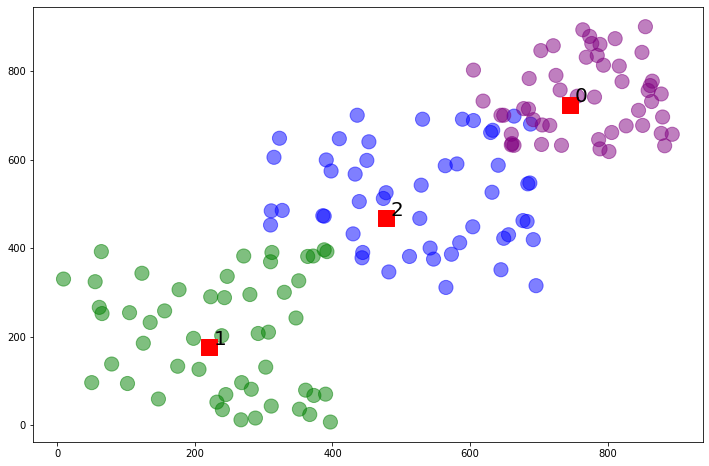

In [15]:
colors = ['green','blue','purple']

plt.figure(figsize=(12,8))
plt.scatter(df['data_x'],df['data_y'], c=df['labels'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors),alpha = 0.5)

plt.scatter(centroids[:,0],centroids[:,1],s=250,c='r',marker='s')

for i in range(len(centroids)):
    plt.annotate(i,(centroids[i][0]+7,centroids[i][1]+7),fontsize=20)
plt.show()

So here is all of the information that we've seen separately before in one visual, the three clusters in different colors, and the cluster centroids as generated by our K-means clustering algorithm. 


The location of these centroids are pretty much at the center of each cluster, showing you that K-means did a pretty good job. 


Once you cluster your data, you can use this K-means clustering model for prediction. You can pass in some new data points and have this model predict which cluster these data points belong to. 



In [25]:
data_test = np.array([[442.,621.],
            [50.,153.],
            [333.,373.],
            [835.,816.]])

Here are the four data points that we'll use for prediction. These are data points that don't belong to the original data. Pass in the four X, Y coordinates that we set up in the form of a NumPy array to the kmeans_model.predict function. 

In [26]:
label_pred = kmeans_model.predict(data_test)

In [27]:
label_pred

array([2, 1, 2, 0])

And here are the label predictions from our model. So the first and third points belong to cluster 2 as per our model, the second point belongs to cluster 1, and the last point belongs to cluster 2. 

And this last data point has X and Y coordinate values, about 800. This belongs to cluster label 0. But before we move on from this toy dataset, let's put all of the information together in one Matplotlib visualization. 

In [28]:
data_test[:,0]

array([442.,  50., 333., 835.])

We'll have a scatter plot of the original data points colored based on the original categories that they belong to. We'll also mark our centroids generated from the K-means clustering model, and on this very same graph, we'll plot the data points belonging to the test data that we had generated, which we use for predictions using the K-means model that we set up. 


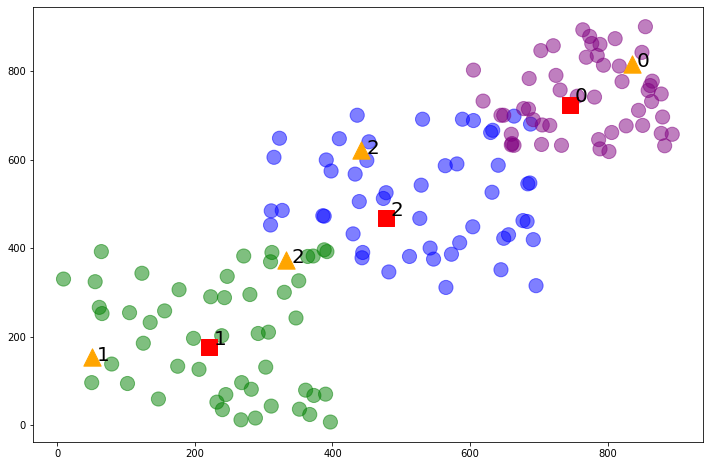

In [30]:
colors = ['green','blue','purple']

plt.figure(figsize=(12,8))

plt.scatter(df['data_x'],df['data_y'], c=df['labels'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors),alpha = 0.5)

plt.scatter(data_test[:,0],data_test[:,1],s=300,c='orange',marker='^')

for i in range(len(label_pred)):
    plt.annotate(label_pred[i],(data_test[i][0]+7,data_test[i][1]-7),fontsize=20)

plt.scatter(centroids[:,0],centroids[:,1],s=250,c='r',marker='s')

for i in range(len(centroids)):
    plt.annotate(i,(centroids[i][0]+7,centroids[i][1]+7),fontsize=20)
plt.show()

And here is what the resulting Matplotlib plot looks like. All of the test instances that we use for prediction are marked with an orange triangle. You can see which clusters they belong to by their position on the scatter plot. The label associated with each test instance is the label assigned by our K-means clustering model. Observe that there is this one point here which lies between 2 clusters, and our model has assigned it to cluster 2.